In [18]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [51]:
customer = pd.read_csv(r"D:\PythonCode\Intellipaat\Machine Learning\Unsupervised Learning\Assignment\customers.csv")

In [52]:
customer.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [53]:
#Check the number of cells in each column with Null values
nul_val = customer.isnull().sum()
nul_val

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Text(0, 0.5, 'Spending Score (1-100)')

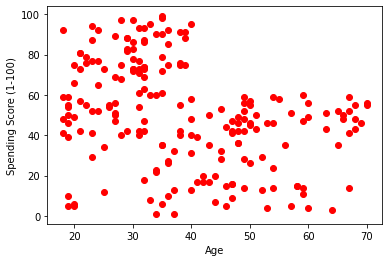

In [62]:
#Create a scatter plot with 'Age' as X and 'Spending Score' as Y
plt.scatter(customer['Age'], customer['Spending Score (1-100)'], c = 'r')
plt.xlabel("Age")
plt.ylabel('Spending Score (1-100)')

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
customer['Gender'] = le.fit_transform(customer['Gender'])
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [74]:
dist_point_from_cluster_center = []
k = range(1,10)
for no_of_clusters in k :
    k_model = KMeans(n_clusters = no_of_clusters)
    k_model.fit(customer)
    dist_point_from_cluster_center.append(k_model.inertia_)

In [75]:
dist_point_from_cluster_center

[975512.06,
 387065.7137713772,
 271384.50878286787,
 195401.19855991477,
 157183.29637394776,
 122637.55796110148,
 103233.01724386725,
 86053.67444777439,
 77390.85572808835]

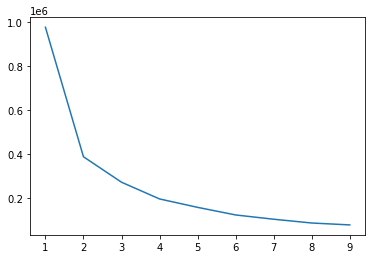

In [76]:
plt.plot(k, dist_point_from_cluster_center)

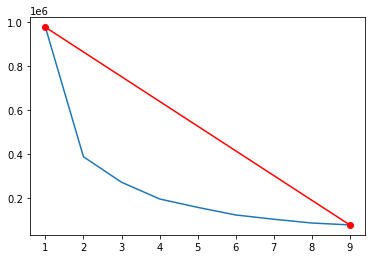

In [77]:
plt.plot(k, dist_point_from_cluster_center)
plt.plot([k[0], k[8]], [dist_point_from_cluster_center[0], dist_point_from_cluster_center[8]], 'ro-')

In [78]:
#Calculating distance between a point and a line
#d = |Ax1 + By1 + C| / (A^2 + B^2)½

def calcuate_distance(x1, y1, a, b, c) :
    dist = abs((a * x1 + b * y1 + c)/(math.sqrt(a * a + b * b)))
    return dist

In [79]:
a = dist_point_from_cluster_center[0] - dist_point_from_cluster_center[8]
b = k[8] - k[0]
c1 = dist_point_from_cluster_center[8] * k[0]
c2 = dist_point_from_cluster_center[0] * k[8]
c = c1 - c2

In [80]:
distance_of_point_from_line = []
for i in range(9):
    distance_of_point_from_line.append(calcuate_distance(k[i], dist_point_from_cluster_center[i], a, b, c))

distance_of_point_from_line

[0.0,
 4.241576245262116,
 4.272004694679734,
 3.94882479301816,
 3.289250134338429,
 2.5969657366568044,
 1.7698113671006288,
 0.9228360833028657,
 2.073935166319863e-15]

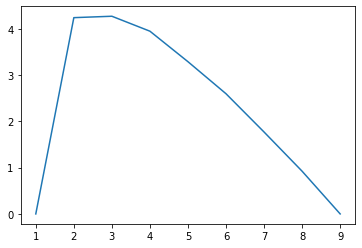

In [81]:
plt.plot(k, distance_of_point_from_line)

In [84]:
print("Optimum value of K is :" + str(distance_of_point_from_line.index(max(distance_of_point_from_line)) + 1))

Optimum value of K is :3


In [109]:
k_model_final = KMeans(n_clusters = 3, max_iter = 300, n_init= 15)
k_model_final.fit(customer)
pred = k_model_final.predict(customer)

Text(0, 0.5, 'Spending Score (1-100)')

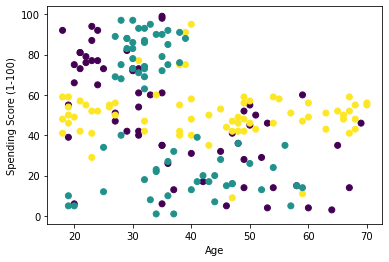

In [110]:
plt.scatter(customer['Age'], customer['Spending Score (1-100)'], c = pred)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')